# 最急降下法

In [1]:
try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、notebook フォルダにある myplotly.py を選択し、アップロードしてください')
    print('===========')
    files.upload()
except:
    print('ローカル環境での実行です')

Google Colab. 上での実行です
「ファイルを選択」から、notebook フォルダにある myplotly.py を選択し、アップロードしてください


Saving myplotly.py to myplotly.py


### 事前に、端末にてplotlyをインストールしておくこと

In [2]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * #コンタ描画用
import myplotly

### 最急降下法とは
関数の勾配が最も急な方向に探索の方向を取りながら最小点を目指す方法。

### 2次2変数の最小値探索問題(凸2次計画問題)
#### 関数 $f(x,y)=(x-3)^2+(2y-1)^2$の最小点を求めよ。

この問題を最急降下法で解いてみる。  
まずは、$x,y$のそれぞれについて微分を行う。これを偏微分という。
$$\frac{\partial f}{\partial x} = 2x -6$$
  
$$\frac{\partial f}{\partial y} = 8y -4$$
偏微分の結果は、ある場所におけるある方向の傾きを表す関数になっている。2つを並べると以下のように表現できる。
$$\nabla f(x,y)=(2x-6,8y-4)$$
これを勾配ベクトルと呼ぶ。  
最小値探索問題において、進むべき方向は関数の値が小さくなる方向であるため、山を下る際は勾配ベクトルにマイナスをつける。
$$- \nabla f(x,y)=(-(2x-6),-(8y-4)) = (-2x+6,-8y+4)$$
例えば、$(x,y)=(1,1)$での負の勾配ベクトルは、
$$- \nabla f(1,1)=(-2*1+6,-8*1+4)=(4,-4)$$
となるため、ある人が$(x,y)=(1,1)$にいる場合、進むべき方向はX軸正の方向を基準として-45°となる。

### $f(x,y)=(x-3)^2+(2y-1)^2$のグラフを描画する

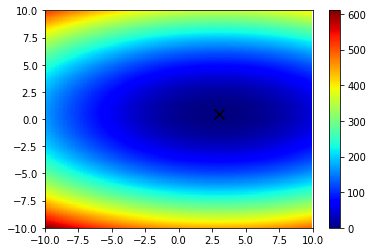

In [3]:
axis_x = np.arange(-10,10,0.1)
axis_y = np.arange(-10,10,0.1)
mx, my = meshgrid(axis_x, axis_y) 

#目的関数の値をつくる。
mz = np.ones([200,200])
for i,y in enumerate(axis_y):
    z = [] 
    for x in axis_x:
        z.append((x-3)**2 + (2*y-1)**2) #目的関数
    mz[i] = z
    
#目的関数
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()

#目的関数の最小値
plt.scatter(x=3,y=0.5,marker="x",s=100,c="k")

#表示範囲
plt.xlim([-10,10])
plt.ylim([-10,10])

#描画
plt.show()

### $f(x,y)=(x-3)^2+(2y-1)^2$のグラフを3次元で描画する

In [4]:
myplotly.graph3d(mx, my, mz)

### [演習]
* 最急降下法における値の更新式は以下のようになります。    
$\displaystyle x = x - \alpha * \frac{\partial f}{\partial x}$  
$\displaystyle y = y - \alpha * \frac{\partial f}{\partial y}$　　  
$\alpha : 学習率$
* 上記更新式を参考にしながら、以下の最急降下法の計算を完成させましょう。  

In [ ]:
#条件設定
x = -9#初期値
y = -9#初期値
alpha = 0.1 #学習率
diff = 1 #変化量の初期値
maxIter = 2000 #最大ループ回数
threshold = 1.0e-5 #収束判定閾値

#結果を格納するdataframe
i = 0 
df_re = pd.DataFrame()
df_re.loc[i,"x"] = x
df_re.loc[i,"y"] = y
df_re.loc[i,"diff"] = diff
i += 1

#計算
while diff >      :
    x_pre = x
    y_pre = y
    dx = 
    dy = 
    x -= alpha * 
    y -= alpha * 
    diff = np.abs(x - x_pre) + np.abs(y - y_pre)
    df_re.loc[i,"x"] = x
    df_re.loc[i,"y"] = y
    df_re.loc[i,"diff"] = diff
    i += 1
    
    if i > maxIter:
        break
        
print(i, round(x,3), round(y,3), diff)

### 結果のプロット

In [ ]:
axis_x = np.arange(-10,10,0.1)
axis_y = np.arange(-10,10,0.1)
mx, my = meshgrid(axis_x, axis_y) 

#目的関数の値をつくる。
mz = np.ones([200,200])
for i,y in enumerate(axis_y):
    z = [] 
    for x in axis_x:
        z.append((x-3)**2 + (2*y-1)**2) #目的関数
    mz[i] = z
    
#目的関数
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()

#目的関数の最小値
plt.scatter(x=3,y=0.5,marker="x",s=100,c="black")

#表示範囲
plt.xlim([-10,10])
plt.ylim([-10,10])

#探索点
plt.plot(df_re["x"],df_re["y"],marker="o",c="k")

#描画
plt.show()

### [演習]
- 初期値を(x,y)=(9,9)に変更すると結果はどうかわるでしょうか？
- 学習率$\alpha$を0.2に変更すると結果はどうかわるでしょうか？
- 学習率$\alpha$を0.3に変更すると結果はどうかわるでしょうか？